In [ ]:
## Максимальное правдоподобие

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
from scipy.special import gammaln

def facln(n):
    return gammaln(n+1)

%matplotlib inline

In [67]:
def gen_sample(n, l):
    return scipy.random.poisson(l, n)

In [14]:
def gen_lnl(sample):
    n = len(sample)
    def lnl(l):
        s = -n*l
        s += sum(sample)*np.log(l)
        s -= sum(facln(m_j) for m_j in sample)
        return s
    return lnl
        

In [123]:
def estimate(sample, bounds=(0, 10**5)):
    lnl = gen_lnl(sample)
    invlnl = lambda z: -lnl(z)
    l_0 = scipy.optimize.minimize(
        invlnl,
        1,
        method="l-bfgs-b",
        bounds=(bounds,)).x[0]
    return l_0


def likelihoodln(sample, bounds=(0, 10**5)):
    lnl = gen_lnl(sample)
    invlnl = lambda z: -lnl(z)
    l_0 = scipy.optimize.minimize(
        invlnl,
        1,
        method="l-bfgs-b",
        bounds=(bounds,)).x[0]
    return lnl(l_0)


def iteration(n, l):
    s = gen_sample(n, l)
    lnl = gen_lnl(s)
    l_0 = estimate(s, bounds=(0, l))
    ab = np.linspace(0, l, 1000)
    def plot_like():
        plt.plot(ab, [lnl(l) for l in ab])
        plt.scatter(l_0, lnl(l_0))
        plt.show()
    return (l_0, lnl(l_0), plot_like)

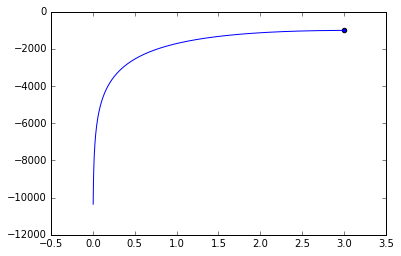

3.0


In [126]:
l_0, lnl_l0, plot = iteration(512, 3)
plot()
print(l_0)

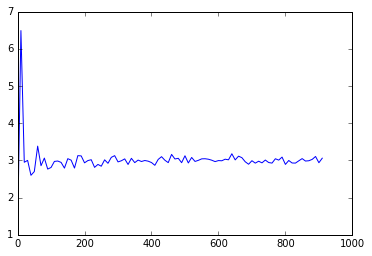

In [118]:
nn = list(10*k for k in range(92))
ll = [estimate(gen_sample(n, 3)) for n in nn]
plt.plot(nn, ll)

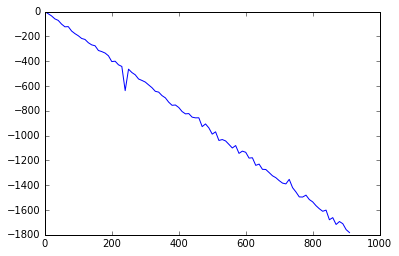

In [125]:
nn = list(10*k for k in range(92))
ll = [likelihoodln(gen_sample(n, 3)) for n in nn]
plt.plot(nn, ll)